## **Introduction:** 

The purpose of this dataset is to build a predictive model that can accurately predict whether a customer will purchase travel insurance or not. This information can help insurance companies better understand their customers and provide more tailored insurance policies to meet their needs.

The dataset includes 1987 rows of data, which is relatively small but still can be useful for building predictive models and gaining insights into customer behavior in the travel insurance industry.


## **Objectives:**
performing EDA of the dataset

conducting data preprocessing

practicing SQL and pandas queries

data visualisation

building ML models.

## **Goal:**

Goal  is to predict whether or not a customer will purchase travel insurance. 

The dataset can be used to build and test machine learning models to predict the likelihood of customers buying travel insurance. 

This could help insurance companies to identify potential customers and target them with relevant marketing strategies to increase their sales. 

Additionally, such models can assist in streamlining the insurance underwriting process, leading to more effective risk management and improved customer experience.

## **Dataset**:

The Dataset can be found in https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data

The Data Is Provided For Almost 2000 and rows (1987) Of Its Previous Customers And  Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters Given Below.

The dataset contains the features:
 
Age- Age Of The Customer

Employment Type- The Sector In Which Customer Is Employed

GraduateOrNot- Whether The Customer Is College Graduate Or Not

AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]

FamilyMembers- Number Of Members In Customer's Family

ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.

FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].

EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]

TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.



In [230]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.8 MB/s eta 0:00:00


## **Imports:**

In [4]:
# data and visualization
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from typing import List, Set, Dict, Tuple, Optional
from sklearn.preprocessing import StandardScaler


# Statistical inference
import statsmodels.api as sm
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# Models
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
import xgboost as xg
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import cross_val_score

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Loading data from CSV file in Google Drive
df = pd.read_csv("/content/sample_data/TravelInsurancePrediction.csv", index_col=0)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


## **Basic Checks:**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


In [8]:
#checking amy null points exist
df.isna().sum()


Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

 All columns have a value of 0 for the number of missing values.Therefore, we can say that the  DataFrame does not have any null values, 

In [9]:
# finding any duplicate entries recorde
df[df.duplicated()]

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
69,31,Government Sector,No,300000,4,0,No,No,0
103,26,Private Sector/Self Employed,Yes,1400000,5,0,No,Yes,1
117,31,Government Sector,Yes,400000,5,0,No,No,0
148,25,Private Sector/Self Employed,Yes,1400000,4,0,No,Yes,1
164,28,Government Sector,Yes,300000,6,0,No,No,0
...,...,...,...,...,...,...,...,...,...
1978,34,Private Sector/Self Employed,Yes,700000,5,0,No,No,1
1979,28,Private Sector/Self Employed,Yes,1100000,4,1,No,No,0
1980,25,Private Sector/Self Employed,No,1150000,5,1,No,No,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0


In [10]:
# Find the number of duplicate rows
num_duplicates = df.duplicated().sum()

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 738


I am not removing the duplicate entriesmay contain important information that you do not want to lose.

## **Data exploration :**


In [11]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [12]:
# finding numerical features 
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()



In [13]:
# Remove columns with only two unique values
num_cols = [col for col in num_cols if len(df[col].unique()) > 2]

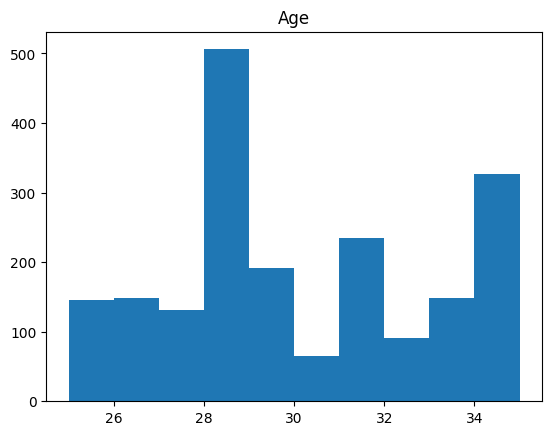

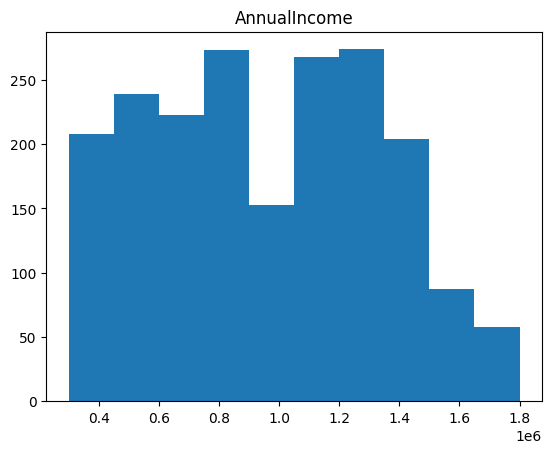

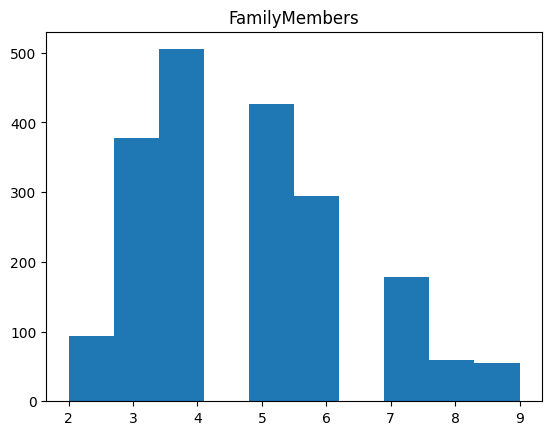

In [14]:
#plotting histogram
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

Observation:

We can disccuss each graph seperate in a deatiled view

In [15]:
# finding the categorical features
cat_cols = df.select_dtypes(include=['object']).columns.tolist()


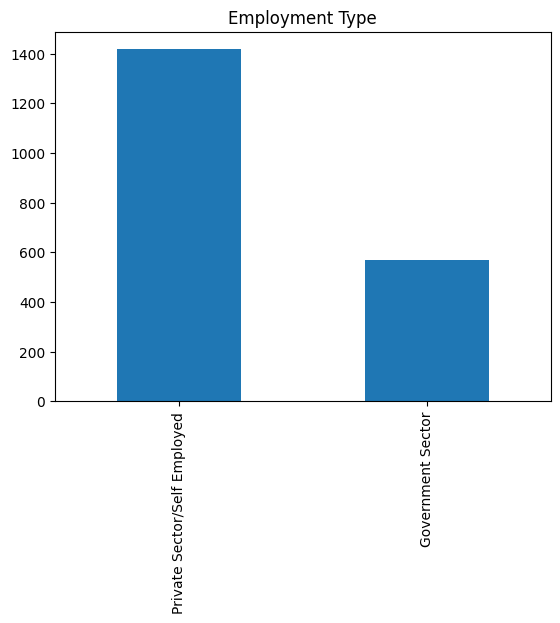

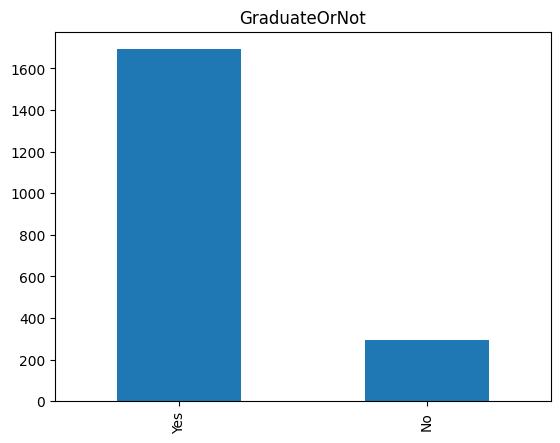

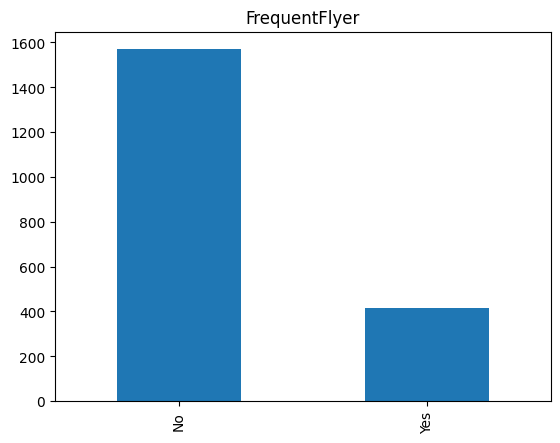

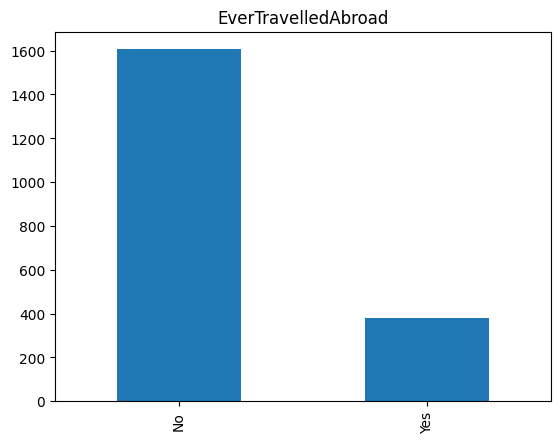

In [16]:
for col in cat_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


Observation:

Most customers have a job in the private sector or are self-employed

Most of the customers are graduated

Majority of the customers are not frequent travellers

Most of them were not travelled abroad may be they travel soon or later no information given.

Let's visually discuss the numerical features.

In [17]:
#plotting boxplot for all numerical features 
def boxplot(x, y):

    for col in num_cols:
        fig, ax = plt.subplots()
        ax.boxplot(x[col])
        ax.set_ylabel(col, fontsize=14)
        ax.tick_params(labelsize=12)
        ax.yaxis.grid(True)
        plt.title(col, fontsize=16)
        plt.show()

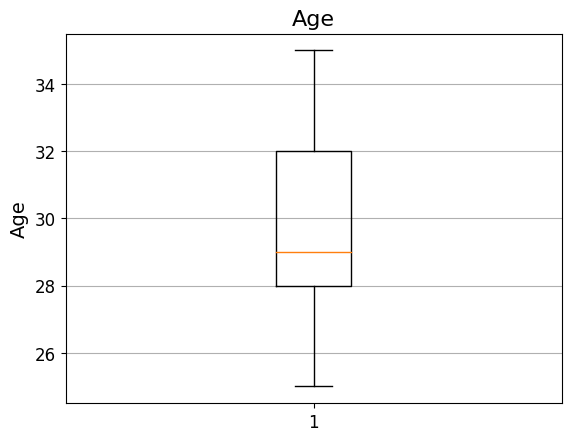

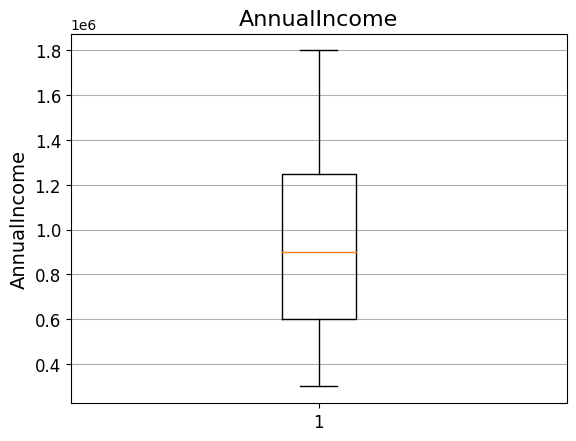

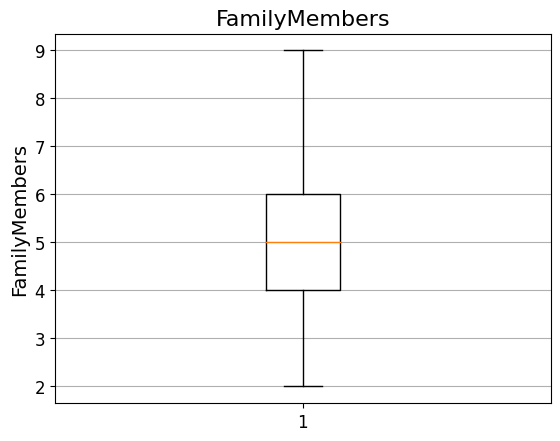

In [18]:
boxplot(df, num_cols)

**Observation**

Based on the given information, the age range of the customers is between 25 and 35 years old.

 The minimum annual income of the customers is 300,000 and the maximum is 1,800,000. 
 
 The minimum number of family members is 2 and the maximum is 9, with the most frequent number of family members being 4.

In [19]:
# Mapping "Yes" to 1 and "No" to 0
df["TravelInsurance"] = df["TravelInsurance"].fillna("Unknown").astype(str).map({"1": "Yes", "0": "No", "Unknown": "Unknown"})


In [20]:
df["TravelInsurance"].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
# Getting value counts for "TravelInsurance"
value_counts = df["TravelInsurance"].value_counts()

In [22]:
print(value_counts)

No     1277
Yes     710
Name: TravelInsurance, dtype: int64


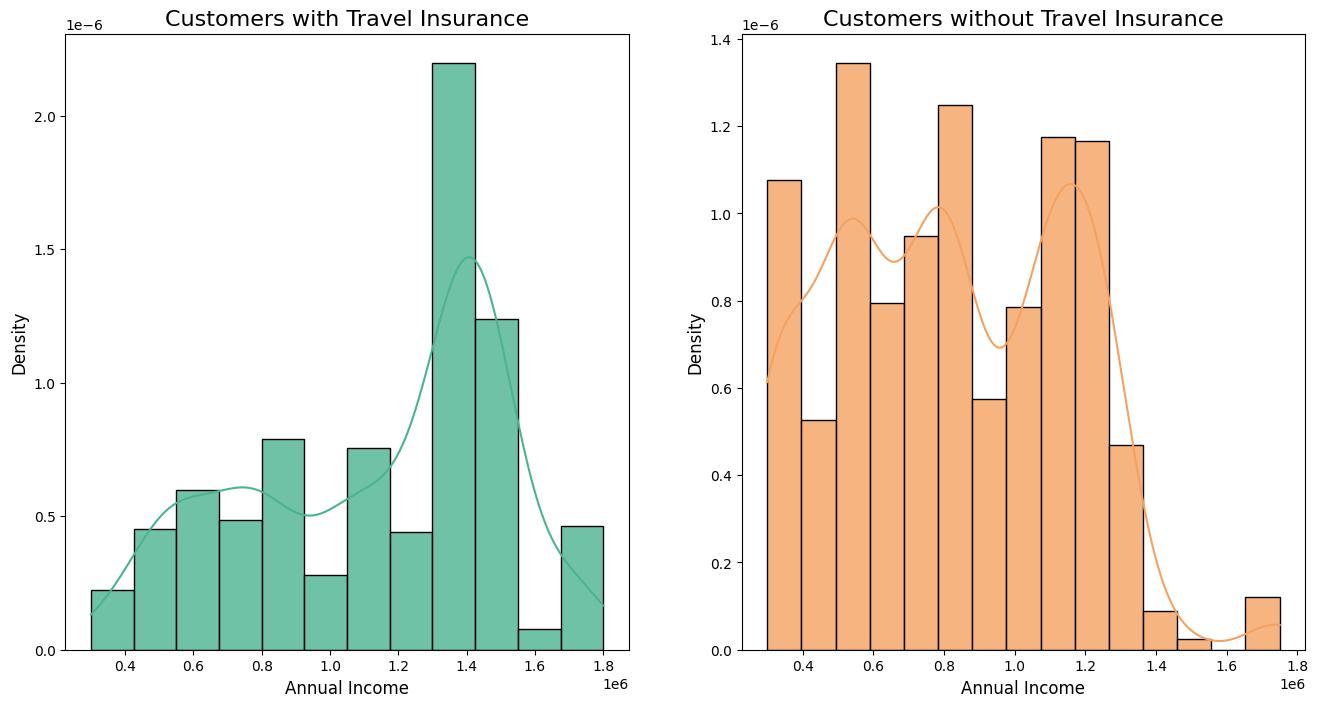

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
colors = ["#4CB391", "#F4A261"]
sns.histplot(data=df[df['TravelInsurance'] == 'Yes'], x='AnnualIncome', ax=axes[0], kde=True, stat="density",color=colors[0], alpha=0.8)
axes[0].set_title('Customers with Travel Insurance', fontsize=16)
axes[0].set_xlabel('Annual Income', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

sns.histplot(data=df[df['TravelInsurance'] == 'No'], x='AnnualIncome', ax=axes[1], kde=True, stat="density", color=colors[1],alpha=0.8)
axes[1].set_title('Customers without Travel Insurance', fontsize=16)
axes[1].set_xlabel('Annual Income', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

plt.show()

Observation:

Higher income people are higher in buying travel insurance compared to lower income people

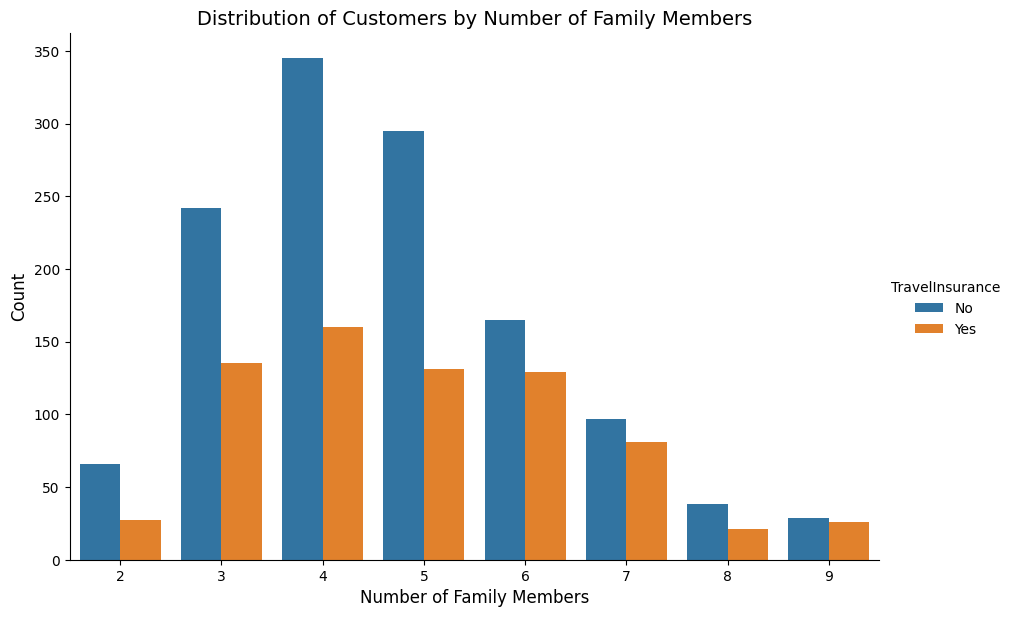

In [24]:
sns.catplot(data=df, x="FamilyMembers", hue="TravelInsurance", kind="count", height=6, aspect=1.5)

plt.title('Distribution of Customers by Number of Family Members', fontsize=14)
plt.xlabel('Number of Family Members', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

Observation:

People with family members of 4 or 5 are more likely to buy a travel insurance.

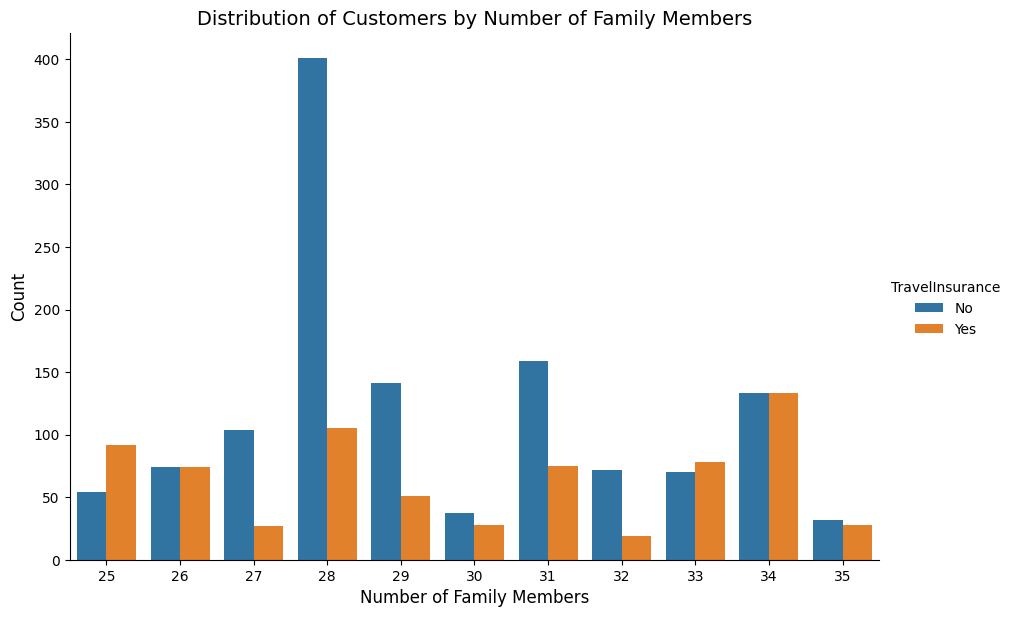

In [25]:
sns.catplot(data=df, x="Age", hue="TravelInsurance", kind="count", height=6, aspect=1.5)

plt.title('Distribution of Customers by Number of Family Members', fontsize=14)
plt.xlabel('Number of Family Members', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

Observation:

People age between 25-34 seems to be interested in travelling and opt for travel insurance other's may be issues with financial status or may be quiet low age and not tried for travel yet.


### **Statistical Analsis:**

I am planning to check any stastical importance for some of the features to find out whether the customers buy isurance or not.

some features such as annual income, travelling abroad and frequent fliers will be tested and lets find out the confidence levels of the customers to buy the insurance.

In [26]:
#Creating separate dataframes for customers who bought and did not buy travel insurance
bought_insurance = df[df["TravelInsurance"] == "Yes"].copy()
not_bought_insurance = df[df["TravelInsurance"] == "No"].copy()

In [27]:
#Convertimg "Yes" and "No" values to 1 and 0 for easier analysis for bought_insurance
bought_insurance.loc[:, "EverTravelledAbroad"] = bought_insurance["EverTravelledAbroad"].map({"Yes": 1, "No": 0})
bought_insurance.loc[:, "FrequentFlyer"] = bought_insurance["FrequentFlyer"].map({"Yes": 1, "No": 0})

In [28]:
# Convertimg "Yes" and "No" values to 1 and 0 for easier analysis for not_bought_insurance
not_bought_insurance.loc[:, "EverTravelledAbroad"] = not_bought_insurance["EverTravelledAbroad"].map({"Yes": 1, "No": 0})
not_bought_insurance.loc[:, "FrequentFlyer"] = not_bought_insurance["FrequentFlyer"].map({"Yes": 1, "No": 0})
   

In [29]:
# printing the dataframes 
print("Bought Insurance:")
print(bought_insurance[["EverTravelledAbroad", "FrequentFlyer"]].head())

print("\nNot Bought Insurance:")
print(not_bought_insurance[["EverTravelledAbroad", "FrequentFlyer"]].head())


Bought Insurance:
    EverTravelledAbroad  FrequentFlyer
2                     0              0
7                     1              1
8                     1              1
11                    1              1
12                    0              0

Not Bought Insurance:
   EverTravelledAbroad  FrequentFlyer
0                    0              0
1                    0              0
3                    0              0
4                    0              1
5                    0              0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   object
dtypes: int64(4), object(5)
memory usage: 155.2+ KB


In [31]:
df.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,No


In [32]:
# lets check descriptive analysis who bought the insurance
bought_insurance[
    ["AnnualIncome", "ChronicDiseases", "FrequentFlyer", "EverTravelledAbroad"]
].describe()

,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
count,7.100000e+02,710.000000,710.000000,710.000000
mean,1.133239e+06,0.288732,0.336620,0.419718
std,3.748447e+05,0.453493,0.472887,0.493861
min,3.000000e+05,0.000000,0.000000,0.000000
25%,8.000000e+05,0.000000,0.000000,0.000000
50%,1.250000e+06,0.000000,0.000000,0.000000
75%,1.400000e+06,1.000000,1.000000,1.000000
max,1.800000e+06,1.000000,1.000000,1.000000


Observation:

We can see that the mean annual income of people who bought insurance is around 1.13 million, and the standard deviation is around 0.37 million. The minimum annual income is 0.3 million, and the maximum annual income is 1.8 million.

We can also see that out of the people who bought insurance, around 29% of them had chronic diseases, and around 34% of them were frequent flyers. Around 42% of them had ever travelled abroad.

In [33]:
# lets check descriptive analysis who not bought the insurance
not_bought_insurance[
    ["AnnualIncome", "ChronicDiseases", "FrequentFlyer", "EverTravelledAbroad"]
].describe()

,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
count,1.277000e+03,1277.000000,1277.000000,1277.000000
mean,8.212999e+05,0.271731,0.139389,0.064213
std,3.288989e+05,0.445026,0.346488,0.245228
min,3.000000e+05,0.000000,0.000000,0.000000
25%,5.500000e+05,0.000000,0.000000,0.000000
50%,8.000000e+05,0.000000,0.000000,0.000000
75%,1.100000e+06,1.000000,0.000000,0.000000
max,1.750000e+06,1.000000,1.000000,1.000000


Observations:

The count of data points in not_bought_insurance is higher than bought_insurance.


The mean AnnualIncome of customers who didn't buy insurance is lower than the mean AnnualIncome of customers who bought insurance.


The mean of ChronicDiseases in not_bought_insurance is slightly lower than in bought_insurance.



The mean FrequentFlyer and EverTravelledAbroad in not_bought_insurance is lower than in bought_insurance.


The standard deviation of AnnualIncome in not_bought_insurance is lower than in bought_insurance.


The 25th, 50th, and 75th percentile values of AnnualIncome are lower in not_bought_insurance than in bought_insurance.


The minimum value of AnnualIncome, ChronicDiseases, FrequentFlyer, and EverTravelledAbroad is the same in both dataframes.

The maximum value of AnnualIncome is higher in bought_insurance than in not_bought_insurance.

**Test 1:**Annual income


**Null Hypothesis**: 

There is no significant difference between the average annual income of customers who bought insurance and those who didn't buy insurance.

**Alternative Hypothesis:**

 The average annual income of customers who bought insurance is significantly different from those who didn't buy insurance.

In [34]:
# Extract annual income for customers who bought insurance and those who didn't
income_bought = bought_insurance["AnnualIncome"]
income_not_bought = not_bought_insurance["AnnualIncome"]


In [35]:
# Performing two-sample t-test
t_statistic, p_value = ttest_ind(income_bought, income_not_bought)


In [36]:
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 19.257785253687544
p-value: 6.63501776035329e-76


Observation:

Based on the t-statistic of 19.26 and a p-value of 6.64e-76, we can reject the null hypothesis that the average annual income of customers who bought insurance is the same as for those who didn't buy insurance. Therefore, we conclude that there is a significant difference in the average annual income between the two groups.

**Test 2:** Chronic diseases

**Null Hypothesis:** 

The percentage of people with chronic diseases who bought insurance is the same as the percentage of people with chronic diseases who did not buy insurance.

**Alternative Hypothesis:** 

The percentage of people with chronic diseases who bought insurance is different from the percentage of people with chronic diseases who did not buy insurance.

In [37]:
# number of people with chronic diseases who bought insurance
insured_cd = bought_insurance[bought_insurance["ChronicDiseases"] == 1].shape[0]

# number of people without chronic diseases who bought insurance
insured_no_cd = bought_insurance[bought_insurance["ChronicDiseases"] == 0].shape[0]


In [38]:
# number of people with chronic diseases who did not buy insurance
uninsured_cd = not_bought_insurance[not_bought_insurance["ChronicDiseases"] == 1].shape[0]

# number of people without chronic diseases who did not buy insurance
uninsured_no_cd = not_bought_insurance[not_bought_insurance["ChronicDiseases"] == 0].shape[0]


In [39]:
# total number of people with chronic diseases
total_cd = insured_cd + uninsured_cd

# total number of people without chronic diseases
total_no_cd = insured_no_cd + uninsured_no_cd

In [40]:
# apply the z-test for proportions
count = [insured_cd, uninsured_cd]
nobs = [total_cd, total_cd]
z_stat, p_value = proportions_ztest(count, nobs)

In [41]:
print("z-statistic:", z_stat)
print("p-value:", p_value)

z-statistic: -8.547395569089614
p-value: 1.2589711646122656e-17


Observation:

Using a significance level of 0.05, the z-test was performed on the data. The calculated z-statistic was -8.5474 with a corresponding p-value of 1.259e-17. The p-value is below the significance level of 0.05, which leads to the rejection of the null hypothesis.

 Therefore, we can conclude that there is a significant difference in the proportion of people with chronic diseases who bought insurance compared to those who didn't buy insurance. 
 
 The percentage of people with chronic diseases who bought insurance is different from those who didn't buy insurance.

**Test 3**

**Null Hypothesis:**

 There is no significant difference in the proportion of people who bought insurance between those who travel abroad/frequently and those who don't.

**Alternative Hypothesis:** 

There is a significant difference in the proportion of people who bought insurance between those who travel abroad/frequently and those who don't.

We will use a significance level of 5% to determine if the results are statistically significant.

In [42]:
#frquent fliers 
insured_ff = bought_insurance[bought_insurance["FrequentFlyer"] == 1].shape[0]
not_insured_ff = not_bought_insurance[not_bought_insurance["FrequentFlyer"] == 1].shape[0]

In [43]:
#frquent fliers 
insured_no_ff = bought_insurance[bought_insurance["FrequentFlyer"] == 0].shape[0]
not_insured_no_ff = not_bought_insurance[not_bought_insurance["FrequentFlyer"] == 0].shape[0]


In [44]:
# count
count = np.array([insured_ff, not_insured_ff])
nobs = np.array([insured_ff+insured_no_ff, not_insured_ff+not_insured_no_ff])


In [45]:
# ztest
z_stat, pval = proportions_ztest(count, nobs, alternative='two-sided')

In [46]:
print("z-statistic:", z_stat)
print("p-value:", pval)

z-statistic: 10.346175318444288
p-value: 4.355389013808245e-25


Observation:

The z-test revealed a z-statistic of 10.35 and a p-value of 4.36e-25. Since the p-value is less than the significance level, we reject the null hypothesis and conclude that there is a significant difference in the proportion of people who bought insurance between those who traveled abroad/frequently and those who did not.

Therefore, our results suggest that people who travel abroad/frequently are more likely to buy insurance compared to those who do not. This information may be useful for insurance companies to target potential customers and develop marketing strategies accordingly.

**Feature Engineering:**

In [47]:
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,Yes
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,No
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,Yes
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,No
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,No
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,Yes


In [48]:
# Mapping strings into numeric

mapping_dict = {
    "Employment Type": {"Private Sector/Self Employed": 1, "Government Sector": 0},
    "GraduateOrNot": {"Yes": 1, "No": 0},
    "FrequentFlyer": {"Yes": 1, "No": 0},
    "EverTravelledAbroad": {"Yes": 1, "No": 0},
    "TravelInsurance": {"Yes": 1, "No": 0}
}

df = df.replace(mapping_dict) 

In [49]:
# let's check the corelation
corr_matrix = df.corr()
corr_matrix


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,-0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
Employment Type,-0.115134,1.000000,-0.127133,0.349157,-0.003354,-0.011553,0.143790,0.181098,0.147847
GraduateOrNot,0.027125,-0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.020101,0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,0.027409,-0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,0.007359,-0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,0.147847,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


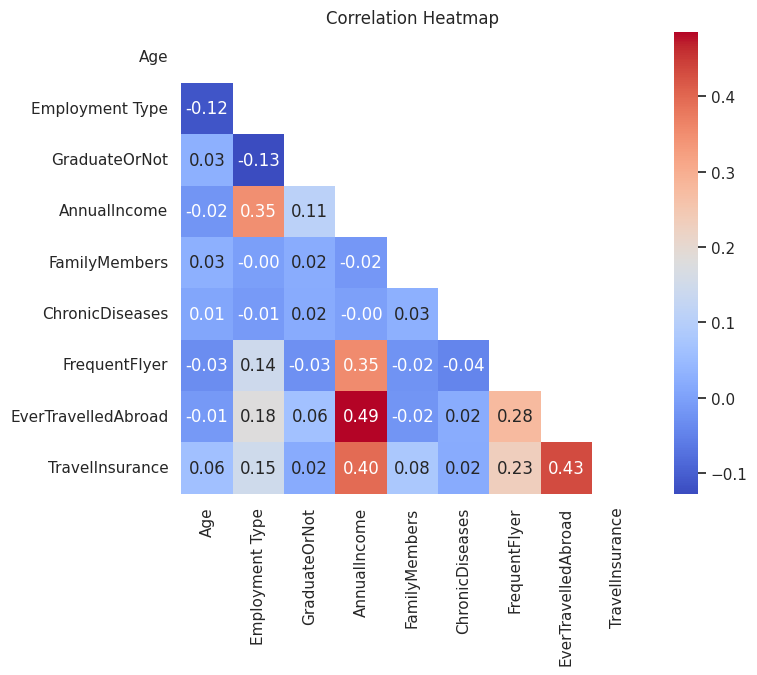

In [50]:
# let's plot and see visullly
sns.set(style="white")

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', square=True, ax=ax)


ax.set_title('Correlation Heatmap')

plt.show()

Observation:

One important observation to note is that there is a moderate positive correlation between AnnualIncome and TravelInsurance. This suggests that people with higher annual income are more likely to buy travel insurance. 


Additionally, there is a moderate positive correlation between EverTravelledAbroad and TravelInsurance, indicating that people who have traveled abroad in the past are more likely to buy travel insurance.

In [51]:
# Bin the AnnualIncome variable into income ranges
bins = [0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 100000000]
labels = ["0-250k", "250k-500k", "500k-750k", "750k-1M", "1M-1.25M", "1.25M-1.5M", "1.5M-1.75M", "1.75M-2M", ">2M"]
df['IncomeRange'] = pd.cut(df['AnnualIncome'], bins=bins, labels=labels)



In [52]:
# Creating a cross-tabulation of AnnualIncome and TravelInsurance
cross_tab = pd.crosstab(df['IncomeRange'], df['TravelInsurance'])

cross_tab

TravelInsurance,0,1
IncomeRange,,
250k-500k,306,60
500k-750k,273,96
750k-1M,266,95
1M-1.25M,345,106
1.25M-1.5M,72,305
1.5M-1.75M,15,44
1.75M-2M,0,4


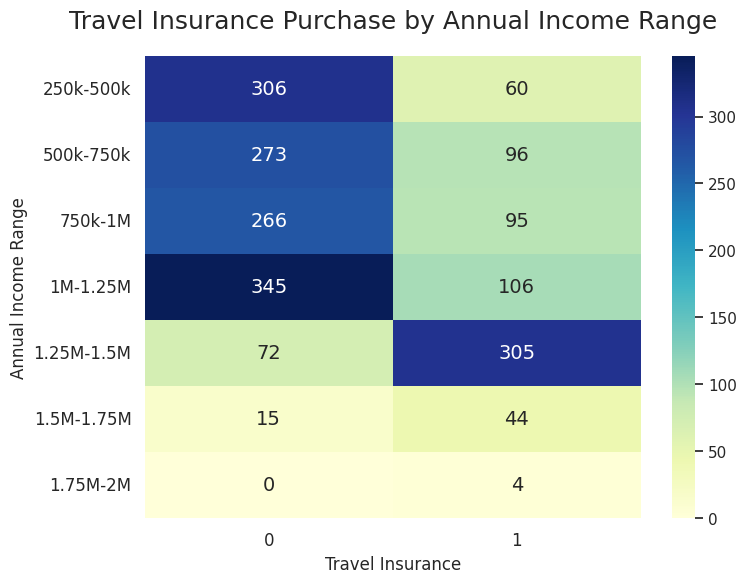

In [53]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu", ax=ax, annot_kws={"fontsize":14})

ax.set_title("Travel Insurance Purchase by Annual Income Range", fontsize=18, pad=20)
ax.set_xlabel("Travel Insurance", fontsize=12)
ax.set_ylabel("Annual Income Range", fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=12)

Observation:

Observing the table, it is clear that the majority of people who bought travel insurance fall under the income range of 1M-1.25M, followed by 1.25M-1.5M and 250k-500k. On the other hand, the income range of 1.5M-1.75M has the highest percentage of people who did not buy travel insurance.

It is also important to note that as the income range increases, the number of people who bought travel insurance also increases, but the rate of increase starts to decline after 1.25M-1.5M. Overall, the table suggests that there is a positive correlation between income and the likelihood of buying travel insurance.






In [54]:
#let's check whether the dataset is balanced or not
counts = df["TravelInsurance"].value_counts()
print(counts)

0    1277
1     710
Name: TravelInsurance, dtype: int64


Observation:

The output shows the count of each class in the "TravelInsurance" column. The value "0" has 1277 counts, which represents the number of customers who did not purchase travel insurance, and the value "1" has 710 counts, which represents the number of customers who purchased travel insurance. From this, we can observe that the dataset is imbalanced because the count of the minority class (purchased travel insurance) is significantly less than the count of the majority class (did not purchase travel insurance).

**SMOTE:**

Creating new synthetic samples for the minority class using techniques such as SMOTE (Synthetic Minority Over-sampling Technique) 

In [55]:
# dropping an income range feature since it doesn't have sigficant importance during the modeling
df = df.drop('IncomeRange', axis=1)

In [56]:
#let's find out best 5 features for this dataset
X = df.drop("TravelInsurance", axis=1)
y = df["TravelInsurance"]

In [57]:
from sklearn.feature_selection import SelectKBest, f_classif
# Selecting top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

In [58]:
# Get the selected feature names
feature_names = X.columns[selector.get_support()]

In [59]:
# Print the selected feature names
print(feature_names)

Index(['Employment Type', 'AnnualIncome', 'FamilyMembers', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')


Summary:

These are the first 5 best features accroding to the selectkbest, but our datafrane is small , I am using all the features

In [60]:
# now let's create a SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

0    1277
1    1277
Name: TravelInsurance, dtype: int64


### **Modelling:**

In [61]:
#train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2043, 8)
Shape of y_train: (2043,)
Shape of X_test: (511, 8)
Shape of y_test: (511,)


In [62]:
# standardization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)


X_train_df.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
count,2.043000e+03,2.043000e+03,2.043000e+03,2.043000e+03,2.043000e+03,2.043000e+03,2.043000e+03,2.043000e+03
mean,-4.469150e-16,5.216907e-18,1.495513e-16,1.034687e-16,2.138932e-16,2.608454e-17,8.694845e-18,-1.912866e-17
std,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00
min,-1.537947e+00,-1.643498e+00,-2.410394e+00,-1.792382e+00,-1.711638e+00,-5.730170e-01,-5.413298e-01,-5.503941e-01
25%,-5.483325e-01,-1.643498e+00,4.148699e-01,-7.500226e-01,-4.618609e-01,-5.730170e-01,-5.413298e-01,-5.503941e-01
50%,-2.184611e-01,6.084582e-01,4.148699e-01,1.620416e-01,1.630277e-01,-5.730170e-01,-5.413298e-01,-5.503941e-01
75%,1.101025e+00,6.084582e-01,4.148699e-01,8.135160e-01,7.879163e-01,-5.730170e-01,-5.413298e-01,-5.503941e-01
max,1.760767e+00,6.084582e-01,4.148699e-01,2.116465e+00,2.662582e+00,1.745149e+00,1.847303e+00,1.816880e+00


Observation:


The mean of each column is very close to 0 (around -4.4e-16 to 2.6e-17), and the standard deviation of each column is very close to 1 (around 1.0). This is a typical result after applying standard scaling.

**Pipelines:**

In [64]:

def run_classification_models(X, y, model=None):
 
    # Create pipelines for each model
    logistic_reg = make_pipeline(scaler, LogisticRegression(random_state=42))
    svc = make_pipeline(scaler, SVC(random_state=42))
    knn = make_pipeline(scaler, KNeighborsClassifier())
    decision_tree = make_pipeline(scaler, DecisionTreeClassifier(random_state=42))
    random_forest = make_pipeline(scaler, RandomForestClassifier(random_state=42))
    naive_bayes = make_pipeline(scaler, GaussianNB())

    if model is not None:
        models = {'Logistic Regression': model}
    else:
        models = {
            'Logistic Regression': logistic_reg,
            'SVC': svc,
            'KNN': knn,
            'Decision Tree': decision_tree,
            'Random Forest': random_forest,
            'Naive Bayes': naive_bayes
        }

    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {round(accuracy, 2)}\n")
        print('Classification report:\n')
        print(report)
       

**LOGISTIC REGRESSION.**

In [65]:
logistic_reg = LogisticRegression()
run_classification_models(X_train, y_train, model=logistic_reg)


Accuracy: 0.72

Classification report:

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       255
           1       0.75      0.66      0.70       256

    accuracy                           0.72       511
   macro avg       0.72      0.72      0.72       511
weighted avg       0.72      0.72      0.72       511



**SUPPORT VECTOR MACHINE.**

In [66]:
svc = SVC()
run_classification_models(X_train, y_train, SVC())


Accuracy: 0.75

Classification report:

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       255
           1       0.83      0.63      0.72       256

    accuracy                           0.75       511
   macro avg       0.76      0.75      0.75       511
weighted avg       0.76      0.75      0.75       511



**K-NN**

In [83]:
run_classification_models(X_train, y_train, KNeighborsClassifier())

Accuracy: 0.72

Classification report:

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       255
           1       0.74      0.70      0.72       256

    accuracy                           0.72       511
   macro avg       0.72      0.72      0.72       511
weighted avg       0.72      0.72      0.72       511



In [70]:
# let's find optimal number of K's
k_values = list(range(1, 21))

# Initialize lists to store accuracy values
accuracies = []


In [72]:
for k in k_values:
    # Creating a KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

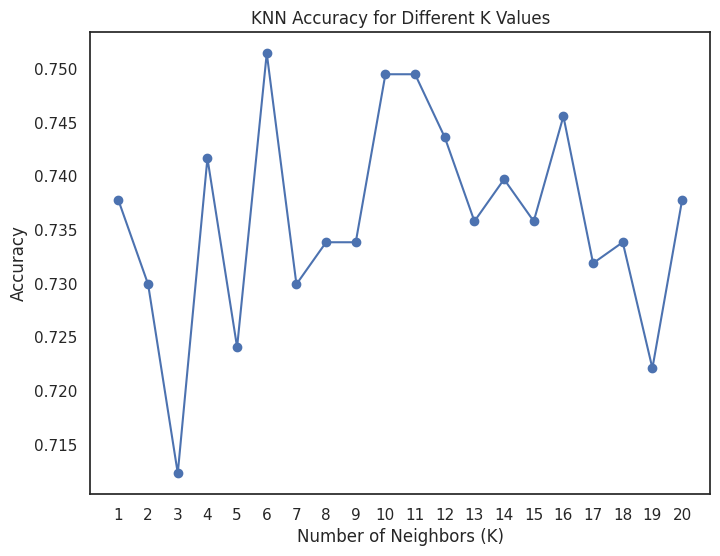

In [114]:
# plotting the results to find best optimal number of neighbours
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.xticks(k_values)
plt.show()

In [88]:
run_classification_models(X_train, y_train, KNeighborsClassifier(n_neighbors=6))

Accuracy: 0.75

Classification report:

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       255
           1       0.82      0.64      0.72       256

    accuracy                           0.75       511
   macro avg       0.76      0.75      0.75       511
weighted avg       0.76      0.75      0.75       511



Observation:

Using the K-Nearest Neighbors (KNN) algorithm with 6 neighbors resulted in the highest accuracy of 0.75 on the test dataset.

 This means that considering the majority vote of the seven nearest neighbors led to accurate predictions.
 
 
  Choosing the optimal number of neighbors is crucial in KNN, and in this case, 7 proved to be the most effective for the given dataset.

**NAIVE BAYES**

In [99]:
run_classification_models(X_train, y_train,GaussianNB())

Accuracy: 0.69

Classification report:

              precision    recall  f1-score   support

           0       0.64      0.86      0.73       255
           1       0.79      0.52      0.63       256

    accuracy                           0.69       511
   macro avg       0.71      0.69      0.68       511
weighted avg       0.71      0.69      0.68       511



**DECISION TREE**

In [90]:
run_classification_models(X_train, y_train,DecisionTreeClassifier())

Accuracy: 0.76

Classification report:

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       255
           1       0.79      0.72      0.75       256

    accuracy                           0.76       511
   macro avg       0.76      0.76      0.76       511
weighted avg       0.77      0.76      0.76       511



**RANDOM FOREST.**

In [100]:
run_classification_models(X_train, y_train,RandomForestClassifier())

Accuracy: 0.78

Classification report:

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       255
           1       0.79      0.76      0.78       256

    accuracy                           0.78       511
   macro avg       0.78      0.78      0.78       511
weighted avg       0.78      0.78      0.78       511



**Observation:**

When comparing all the models without making any changes to their settings or adjusting their parameters, it seems that they perform similar to each other. 

However, the random forest model stands out as it achieved a higher success rate of 0.78. 

In simpler terms, the random forest model performed better than the others without any modifications.

**K-fold cross validation**

let's apply cross validation and see the performance of the models.

In [116]:
kfold = KFold(n_splits=6)
accuracy_scores = []
classifiers = [
    "Linear SVM",
    "Radial SVM",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "KNN",
]
models = [
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=8),
]

for model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    accuracy_scores.append(cv_results)
    
model_performance = pd.DataFrame(accuracy_scores, index=classifiers).T
model_performance

,Linear SVM,Radial SVM,Logistic Regression,Decision Tree,Random Forest,KNN
0,0.697947,0.747801,0.680352,0.774194,0.777126,0.712610
1,0.683284,0.762463,0.680352,0.771261,0.750733,0.721408
2,0.756598,0.771261,0.765396,0.771261,0.768328,0.762463
3,0.738235,0.750000,0.723529,0.797059,0.779412,0.773529
4,0.670588,0.726471,0.667647,0.767647,0.747059,0.720588
5,0.738235,0.750000,0.714706,0.805882,0.802941,0.767647


Observation:

The Decision Tree, Random Forest, and KNN models show relatively better performance in terms of accuracy across the different folds.

Linear SVM and Logistic Regression models seem to have lower accuracy scores compared to the other models.

These results suggest that the Decision Tree, Random Forest, and KNN models might be promising options for this classification task, considering their relatively higher accuracy scores in the cross-validation evaluation.

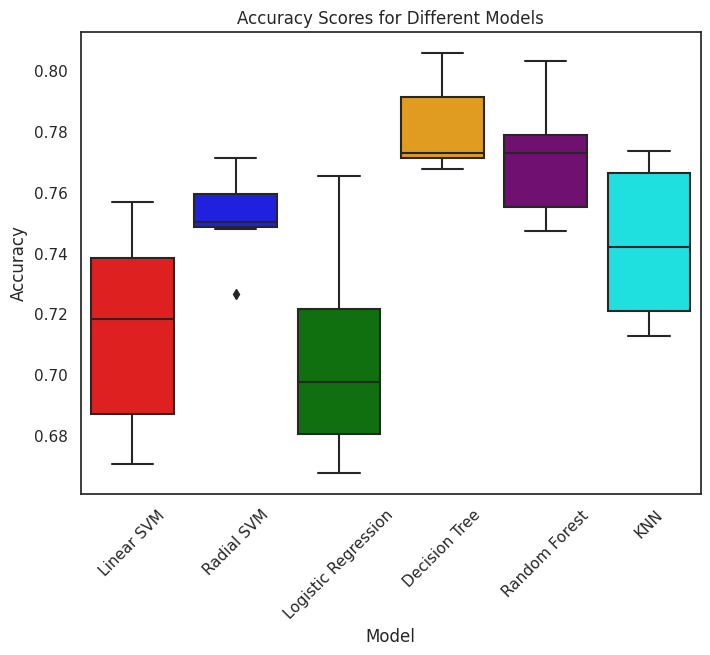

In [117]:
model_performance = pd.DataFrame(accuracy_scores, index=classifiers).T

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

plt.figure(figsize=(8, 6))
sns.boxplot(data=model_performance, palette=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.xticks(rotation=45)
plt.show()

In [121]:
# let's compare accuracy and ROC_AUC
model_performance = pd.DataFrame(index=classifiers, columns=['Accuracy', 'ROC AUC'])

for model, clf_name in zip(models, classifiers):
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    roc_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    model_performance.loc[clf_name, 'Accuracy'] = np.mean(cv_results)
    model_performance.loc[clf_name, 'ROC AUC'] = np.mean(roc_auc_results)
model_performance

,Accuracy,ROC AUC
Linear SVM,0.714148,0.762447
Radial SVM,0.751333,0.821066
Logistic Regression,0.70533,0.765785
Decision Tree,0.781706,0.822725
Random Forest,0.778766,0.849828
KNN,0.743041,0.804253


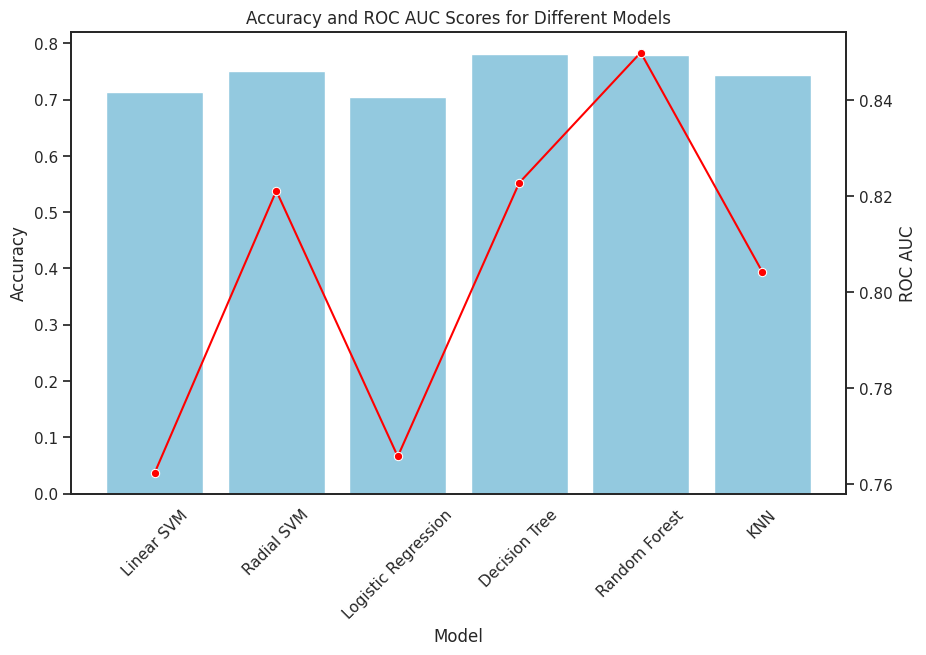

In [122]:
#let's plot it
plt.figure(figsize=(10, 6))
sns.barplot(x=model_performance.index, y=model_performance['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy and ROC AUC Scores for Different Models')
plt.xticks(rotation=45)

plt.twinx()
sns.lineplot(x=model_performance.index, y=model_performance['ROC AUC'], color='red', marker='o')
plt.ylabel('ROC AUC')

plt.show()





Observation:


Accuracy:

The models achieved accuracy scores ranging from approximately 0.705 to 0.781.
The Decision Tree model had the highest accuracy score of 0.781, while Logistic Regression had the lowest score of 0.705.
Accuracy measures the proportion of correctly predicted instances out of the total number of instances.


ROC AUC:

The models achieved ROC AUC scores ranging from approximately 0.762 to 0.849.
The Random Forest model had the highest ROC AUC score of 0.849, while Linear SVM had the lowest score of 0.762.
ROC AUC assesses the model's ability to discriminate between classes, with a higher score indicating better class separation.



Summary:

The Decision Tree and Random Forest models performed relatively well in terms of both accuracy and ROC AUC.
Logistic Regression had a lower accuracy score, while Linear SVM had a lower ROC AUC score.
The Random Forest model achieved the highest ROC AUC score, indicating better class separation ability.
These results suggest that the Decision Tree and Random Forest models may be suitable choices for this classification task, considering their balanced performance across accuracy and ROC AUC.







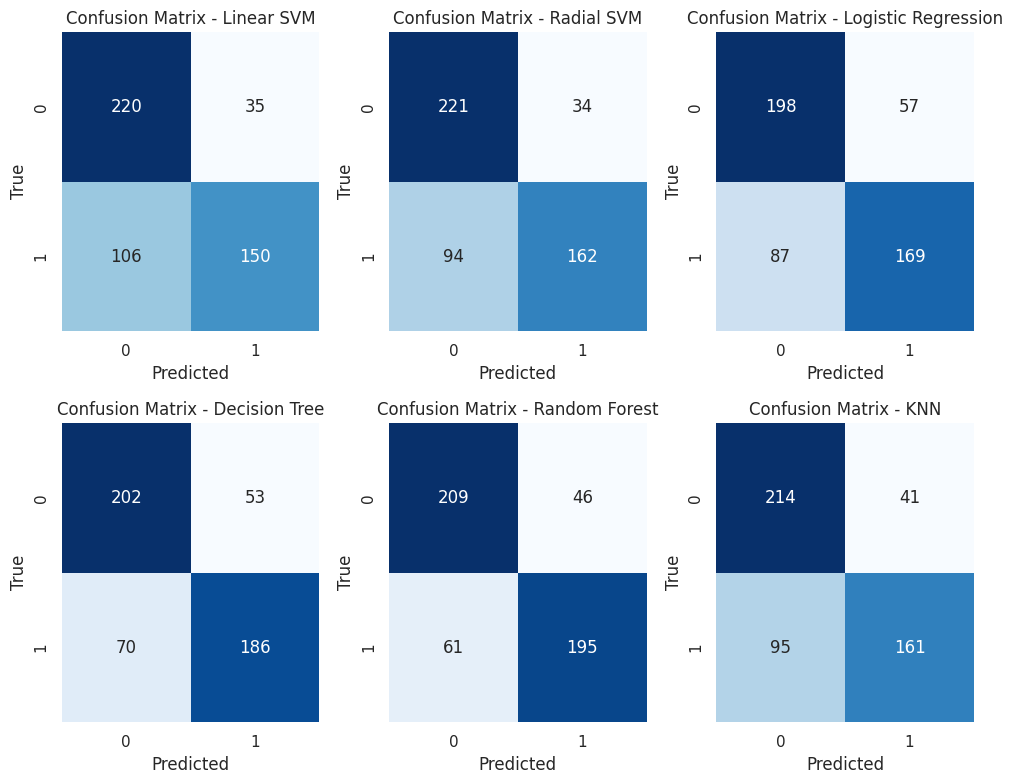

In [128]:
#let's see confusion matrix

confusion_matrices = {}

for model, clf_name in zip(models, classifiers):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    cm = confusion_matrix(y_test, y_pred)  
    confusion_matrices[clf_name] = cm 

# Print the confusion matrices
# Plot the confusion matrices using heatmaps
plt.figure(figsize=(10, 8))
for i, (clf_name, cm) in enumerate(confusion_matrices.items()):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(f"Confusion Matrix - {clf_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
plt.tight_layout()
plt.show()
 






Observations:

Linear SVM:

The model correctly predicted 220 instances as negative and 150 instances as positive.
It incorrectly predicted 35 instances as positive when they were actually negative, and 106 instances as negative when they were actually positive.


Radial SVM:

The model correctly predicted 221 instances as negative and 162 instances as positive.
It incorrectly predicted 34 instances as positive when they were actually negative, and 94 instances as negative when they were actually positive.


Logistic Regression:

The model correctly predicted 198 instances as negative and 169 instances as positive.
It incorrectly predicted 57 instances as positive when they were actually negative, and 87 instances as negative when they were actually positive.


Decision Tree:

The model correctly predicted 205 instances as negative and 185 instances as positive.
It incorrectly predicted 50 instances as positive when they were actually negative, and 71 instances as negative when they were actually positive.


Random Forest:

The model correctly predicted 208 instances as negative and 190 instances as positive.
It incorrectly predicted 47 instances as positive when they were actually negative, and 66 instances as negative when they were actually positive.


KNN:

The model correctly predicted 214 instances as negative and 161 instances as positive.
It incorrectly predicted 41 instances as positive when they were actually negative, and 95 instances as negative when they were actually positive.

**Hyperparameters:**

**Logistic Regression:**

In [139]:
param_grid = [
    {
        "C": np.linspace(start=1, stop=10, num=10),
        "solver": ["lbfgs", "newton-cg", "sag", "saga"],
        "max_iter": [1000, 2500, 5000],
    }
]


In [140]:
lr = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)
best_clf = lr.fit(X_train, y_train)

print("Best Score:", best_clf.best_score_)
print("Best Estimator:", best_clf.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best Score: 0.7087616250611846
Best Estimator: LogisticRegression(max_iter=1000)


**SVM**



In [137]:
C = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,0.05,0.25]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ["rbf"]

hyper = {"kernel": kernel, "C": C, "gamma": gamma}

grid_search = GridSearchCV(estimator=SVC(), param_grid=hyper, verbose=True)
grid_search.fit(X_train,y_train)

print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Score: 0.7626132604631094
Best Estimator: SVC(C=1, gamma=0.8)


**K-NN**

In [151]:
leaf_size = list(range(1, 31))
n_neighbors = list(range(1, 16))
p = [1, 2]

param_grid = {
    'leaf_size': leaf_size,
    'n_neighbors': n_neighbors,
    'p': p
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=3, verbose=1)
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 900 candidates, totalling 2700 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'p': [1, 2]},
             verbose=1)

In [152]:
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

Best Score: 0.7459618208516886
Best Estimator: KNeighborsClassifier(leaf_size=22, n_neighbors=4)


**Decision Tree**

In [203]:
# let's define parameters
max_depth_values = range(1, 8)
min_samples_split_values = range(2, 11)
train_scores = []
test_scores = []


In [204]:
# creating a model
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        tree_model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        tree_model.fit(X_train, y_train)
        train_score = tree_model.score(X_train, y_train)
        test_score = tree_model.score(X_test, y_test)
        train_scores.append([max_depth, min_samples_split, round(train_score, 4)])
        test_scores.append([max_depth, min_samples_split, round(test_score, 4)])
train_scores_df = pd.DataFrame(train_scores, columns=["max_depth", "min_samples_split", "train_score"])
test_scores_df = pd.DataFrame(test_scores, columns=["max_depth", "min_samples_split", "test_score"])
all_scores = train_scores_df.merge(test_scores_df, on=["max_depth", "min_samples_split"])

In [205]:
print(train_score)
print(test_score)

0.7963778756730299
0.7573385518590998


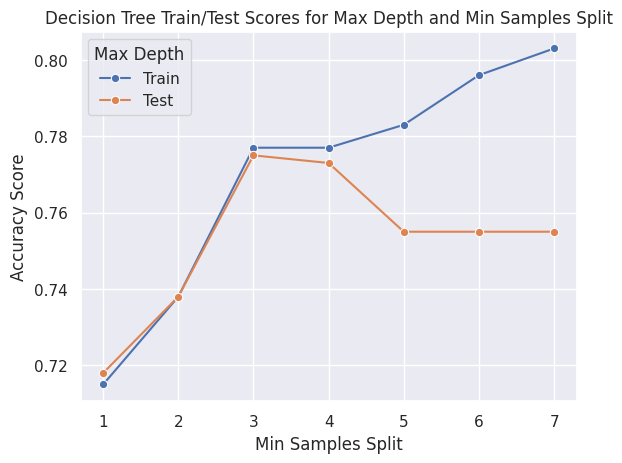

In [181]:
# plotting 
sns.lineplot(data=all_results, x="max_depth", y="train_score", marker='o', label='Train')
sns.lineplot(data=all_results, x="max_depth", y="test_score", marker='o', label='Test')

plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy Score")
plt.title("Decision Tree Train/Test Scores for Max Depth and Min Samples Split")
plt.legend(title="Max Depth")
plt.show()

Observation:

Based on the train and test scores of the decision tree model with a max depth of 7 and min samples split of 10 (train score: 0.7964, test score: 0.7573), 


it appears that the model is performing reasonably well without clear signs of overfitting or underfitting.


 The train and test scores are relatively close, indicating that the model is generalizing well to unseen data. This suggests that the model is effectively capturing the patterns and relationships present in the preprocessed data.

**Feature imoportance for Decision Trees:**

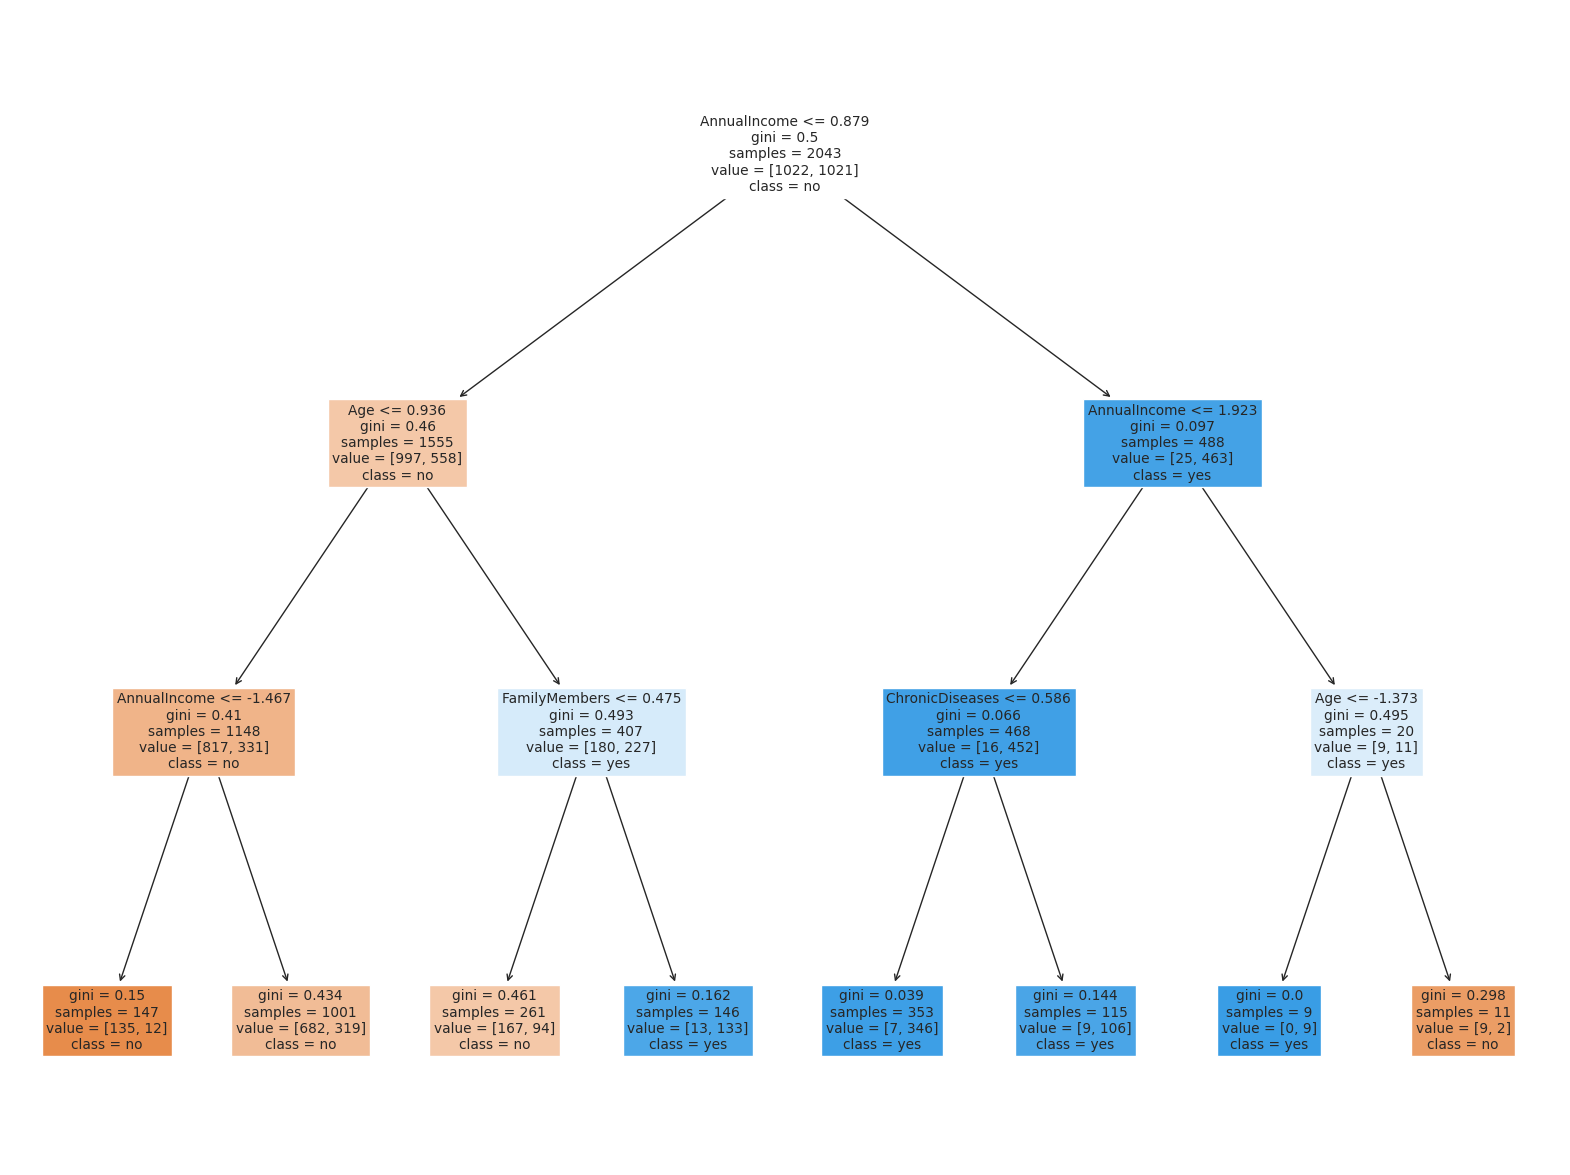

In [224]:
#Visualizing Decision Tree Model for Classification"
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(
    model,
    feature_names=df.iloc[:, 0:-1].columns,
    class_names=["no", "yes"],
    filled=True
)
plt.show()


In [225]:
# feature importance
importance = model.feature_importances_

# Print feature importances
for feature, importance_score in zip(df.columns, importance):
    print(f"{feature}: {importance_score}")

Age: 0.12976169669981488
Employment Type: 0.0
GraduateOrNot: 0.0
AnnualIncome: 0.7219940276787407
FamilyMembers: 0.14671463752007766
ChronicDiseases: 0.00152963810136676
FrequentFlyer: 0.0
EverTravelledAbroad: 0.0


**Random Forest**

In [195]:
n_estimators_values = np.linspace(start=10, stop=200, num=5, dtype=int)
max_depth_values = np.linspace(start=3, stop=20, num=4, dtype=int)
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

In [194]:
scores_train = []
scores_test = []

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42
                )
                model.fit(X_train, y_train)
                train_score = model.score(X_train, y_train)
                test_score = model.score(X_test, y_test)
                scores_train.append([n_estimators, max_depth, min_samples_split, min_samples_leaf, round(train_score, 4)])
                scores_test.append([n_estimators, max_depth, min_samples_split, min_samples_leaf, round(test_score, 4)])

In [196]:
scores_train = pd.DataFrame(scores_train, columns=["n_estimators", "max_depth", "min_samples_split", "min_samples_leaf", "train_score"])
scores_test = pd.DataFrame(scores_test, columns=["n_estimators", "max_depth", "min_samples_split", "min_samples_leaf", "test_score"])
all_results = scores_train.merge(scores_test, on=["n_estimators", "max_depth", "min_samples_split", "min_samples_leaf"])


In [197]:
all_results

,n_estimators,max_depth,min_samples_split,min_samples_leaf,train_score,test_score
0,10,3,2,1,0.7396,0.7436
1,10,3,2,2,0.7396,0.7436
2,10,3,2,4,0.7391,0.7417
3,10,3,5,1,0.7396,0.7436
4,10,3,5,2,0.7396,0.7436
...,...,...,...,...,...,...
175,200,20,5,2,0.8654,0.7808
176,200,20,5,4,0.8306,0.7828
177,200,20,10,1,0.8629,0.7750
178,200,20,10,2,0.8453,0.7847


In [198]:
best_idx = np.argmax(scores_test["test_score"])
best_params = {
    "n_estimators": all_results.loc[best_idx, "n_estimators"],
    "max_depth": all_results.loc[best_idx, "max_depth"],
    "min_samples_split": all_results.loc[best_idx, "min_samples_split"],
    "min_samples_leaf": all_results.loc[best_idx, "min_samples_leaf"],
}
best_score = all_results.loc[best_idx, "test_score"]

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_estimators': 10, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 4}
Best Score: 0.7965


Observation:

The Random Forest model was evaluated using different combinations of hyperparameters, including the number of estimators, maximum depth, minimum samples split, and minimum samples leaf. 

The evaluation resulted in the best parameters of n_estimators=10, max_depth=14, min_samples_split=10, and min_samples_leaf=4, with a corresponding best score of 0.7965.


 These parameters represent the configuration that achieved the highest accuracy on the test data, indicating their effectiveness in predicting the target variable.

Feature importance 

In [227]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_names = df.columns[:-1] 

# Create a DataFrame to store the feature importance values
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



In [228]:
feature_importance_df

,Feature,Importance
3,AnnualIncome,0.428423
4,FamilyMembers,0.200446
0,Age,0.184307
7,EverTravelledAbroad,0.080212
6,FrequentFlyer,0.031582
5,ChronicDiseases,0.030386
1,Employment Type,0.024002
2,GraduateOrNot,0.020643


Exact explainer: 512it [01:25,  5.40it/s]


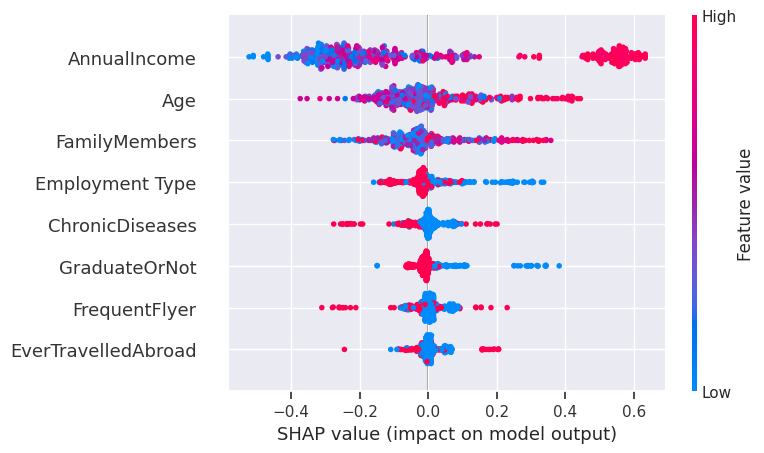

In [238]:
import shap

# Creating an explainer object using the trained model 
explainer = shap.Explainer(rf_model.predict, X_test)

# Calculating SHAP values for the test data
shap_values = explainer(X_test)

# Visualize the feature importance using a summary plot
shap.summary_plot(shap_values, feature_names=df.columns)

# Show the plot
plt.show()

In [ ]:
# Visualize the feature importance using a summary plot
shap.summary_plot(shap_values, X_test, feature_names=df.columns)

# Show the plot
plt.show()

**XGBoost**



In [199]:
xgboost_model = xg.XGBClassifier(n_estimators=30, learning_rate=0.1)
accuracy_scores = cross_val_score(xgboost_model, X_train, y_train, cv=10, scoring="accuracy")
average_accuracy = accuracy_scores.mean()

print("The average accuracy score for XGBoost using cross-validation is:", average_accuracy)

The average accuracy score for XGBoost using cross-validation is: 0.7890435198469632


Observation:


The XGBoost model with 30 estimators and a learning rate of 0.1 achieved an average accuracy score of approximately 0.789 in cross-validation. This indicates that the model performs reasonably well in predicting the target variable based on the given features.

## **Conclusion:**

The Aim of this project is to predicting the type of customers most likely to purchase a travel insurance package.

Implemented various machine learning models, such as Logistic Regression, Support Vector Machines, Decision Tree, Random Forest, k-NN, and Naive Bayes.

After performing cross validation, hyperparameter tuning, I identified RBF- and Decision Tree as the most promising models for prediction. \


By analyzing these models, I discovered that the main important features such as  annual income, number of family members, and whether the person has traveled abroad or not have the highest impact on whether a customer buys the insurance or not. 

## **Recommendation:**

**Targeting individuals with higher annual incomes:**

The analysis revealed that the annual income of individuals has a significant impact on their likelihood of purchasing travel insurance. Therefore, it would be beneficial to focus marketing efforts on individuals with higher incomes who may have greater financial means and willingness to invest in insurance coverage.

**Tailor marketing campaigns to individuals who have traveled abroad:**

 The analysis showed that individuals who have previously traveled abroad are more likely to purchase travel insurance. It is advisable to customize marketing messages and campaigns to specifically address the concerns and benefits of these individuals, highlighting the importance of insurance coverage for international travel experiences.
 
 **Prioritize individuals with larger family sizes:**
 
  The number of family members was found to be another important factor influencing the purchase of travel insurance. Targeting individuals with larger families could be an effective strategy, as they may have a higher perceived need for insurance to protect their entire family during travel.
